## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [37]:
from sklearn import datasets, metrics, linear_model

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 分類樹

In [49]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, cv=5, error_score=0, n_jobs=-1)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    print(f"Average time to fit (s): {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Average time to score (s): {grid.cv_results_['mean_score_time'].mean():.3f}")

In [50]:
from sklearn.pipeline import Pipeline

clf = DecisionTreeClassifier()

pipeline = Pipeline([
    ('clf', clf)
])
params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2,3,4,5,6,7,8,9,10],
    'clf__min_samples_split': [2,3,4,5,6,7,8,9,10],
    'clf__min_samples_leaf': [2,3,4,5,6,7,8,9,10],
}
get_best_model_and_accuracy(pipeline, params, x_train1, y_train1)

Best accuracy: 0.9473684210526315
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 5}
Average time to fit (s): 0.001
Average time to score (s): 0.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train1, x_test1, y_train1, y_test1 = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3, min_samples_leaf=5)

# 訓練模型
clf.fit(x_train1, y_train1)

# 預測測試集
y_pred1 = clf.predict(x_test1)

In [52]:
acc = metrics.accuracy_score(y_test1, y_pred1)
print("Acuuracy: ", acc)

Acuuracy:  0.9777777777777777


In [42]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [43]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.05628805 0.01687314 0.         0.         0.         0.
 0.43127855 0.         0.         0.14745036 0.         0.
 0.34810989]


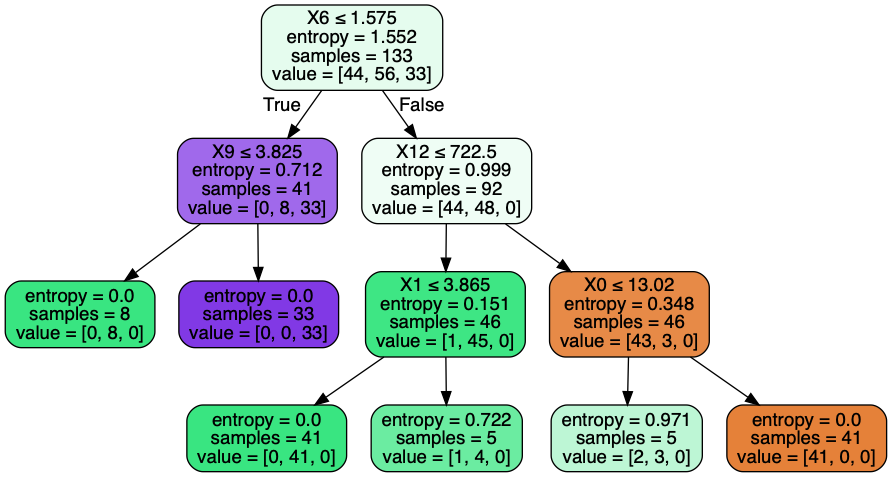

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 羅吉斯回歸

In [45]:
# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train1, y_train1)

# 預測測試集
y_pred2 = logreg.predict(x_test1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
acc = accuracy_score(y_test1, y_pred2)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333
